In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# Constants
c = 2.998e8
h = 6.626e-34
k = 1.381e-23

a_0 = 6.3e-22
v_0 = 3.29e15 
alpha = {"5": 4.54e-19, "10": 2.59e-19, "20": 2.52e-19} # in 10^3 K
n_H = 1e6

radii = {"1": 6.96e8, "7": 1.8722e9, "12": 3.789e9}
luminosities = {"1": 3.9e26, "7": 4.0e29, "12": 4.0e30}
temperatures = {"1": 5796.25855, "7": 20000, "12": 25000}

/var/folders/c2/cx028ngn1svfvfcxvr7tlstw0000gn/T/ipykernel_80566/52274628.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  numerator = v**-1 * (2 * np.pi * a_0 * v_0**3 * radii['7']**2) / (alpha['10'] * c**2 * distance**2) * np.exp(-(v_0**3) / (X*distance*v**3))


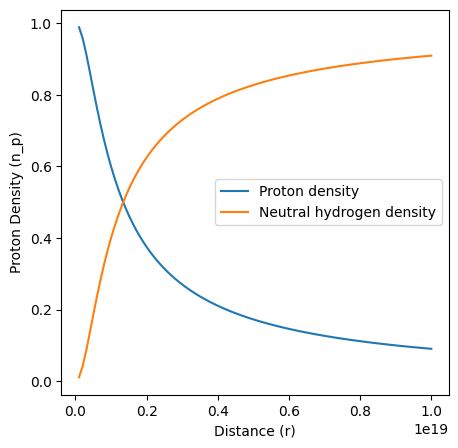

In [101]:
def y(v,distance,X):
    numerator = v**-1 * (2 * np.pi * a_0 * v_0**3 * radii['7']**2) / (alpha['10'] * c**2 * distance**2) * np.exp(-(v_0**3) / (X*distance*v**3))
    denominator = np.exp((h * v) / (k * temperatures['7'])) - 1
    return numerator / denominator

def integral(v,r):
    I = []
    for P,radius in enumerate(r):
        integral_sum = 0
        for j in range(1, len(v)):
            integral_sum += y(v[j], radius,n_p[P]) * (v[j] - v[j-1])
        I.append(integral_sum)
    return I

v = np.linspace(v_0, 1e16, 10000)
r = np.linspace(0, 1e19, 100)

I = np.array(integral(v,r))
n_p = (-I + np.sqrt(I**2 + 4 * I * n_H)) / (2)
x_p = n_p/n_H
x_H0 = 1 - x_p

fig, axs = plt.subplots(figsize=(5, 5))
axs.plot(r, x_p, label = 'Proton density')
axs.plot(r, x_H0, label = 'Neutral hydrogen density')
axs.set_xlabel('Distance (r)')
axs.set_ylabel('Proton Density (n_p)')
plt.legend()
plt.show()



In [96]:
# Finding the intersection point
intersection_r = None
for i in range(len(x_p)):
    x_p_rounded = np.round(x_p[i], 2)
    x_H0_rounded = np.round(x_H0[i], 2)
    if np.isclose(x_p_rounded, x_H0_rounded):
        intersection_r = r[i]
        break

if intersection_r is not None:
    print("Intersection point:")
    print("r =", intersection_r)
else:
    print("No intersection point found.")


No intersection point found.
